In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# SVM
from sklearn.datasets import load_digits
dataset = load_digits()
X = dataset.data 
Y = dataset.target
# Every image - 8 * 8
# MNIST dataset - similar - 28 * 28

In [4]:
X.shape

(1797, 64)

In [5]:
Y.shape

(1797,)

In [6]:
from collections import Counter
Counter(Y)

Counter({0: 178,
         1: 182,
         2: 177,
         3: 183,
         4: 181,
         5: 182,
         6: 181,
         7: 179,
         8: 174,
         9: 180})

In [12]:
from sklearn.svm import SVC
# default - one vs rest (ovr)
# also supports one vs one (ovo)
model = SVC(decision_function_shape='ovr',probability=True,kernel='linear',random_state=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)


In [9]:
X.max(axis=1)

array([15., 16., 16., ..., 16., 16., 16.])

In [10]:
X.max()

16.0

In [13]:
model.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=1)

In [14]:
model.predict(x_test[:10])

array([1, 5, 0, 7, 1, 0, 6, 1, 5, 4])

In [15]:
model.predict_proba(x_test[:10]) # probabilities of the each class

array([[1.12527891e-03, 8.63057016e-01, 5.58044737e-03, 3.47511414e-03,
        4.73517887e-03, 2.89559316e-03, 2.06968009e-03, 2.51384687e-03,
        1.11849919e-01, 2.69792579e-03],
       [4.80919853e-03, 8.90532774e-03, 4.25484079e-03, 1.47597781e-03,
        1.34541126e-03, 8.78784408e-01, 6.18107282e-03, 2.21055659e-02,
        5.53276627e-02, 1.68105345e-02],
       [9.90596936e-01, 1.60630509e-04, 1.72455190e-03, 6.56580773e-04,
        9.67940854e-04, 1.86636533e-03, 1.77702355e-03, 4.29615438e-04,
        1.22135921e-03, 5.98996838e-04],
       [8.54409578e-05, 7.19081048e-04, 2.37659523e-04, 8.04793350e-03,
        5.82594997e-04, 1.38955315e-03, 2.33344923e-04, 9.81842058e-01,
        3.30106761e-03, 3.56126661e-03],
       [1.52781544e-03, 9.05518079e-01, 1.13363663e-03, 5.15073987e-03,
        3.12502136e-02, 3.12551147e-03, 2.08207465e-03, 1.13072554e-03,
        8.28811070e-03, 4.07930932e-02],
       [9.65432924e-01, 9.16513884e-04, 1.17063362e-03, 2.05272536e-03,
   

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,model.predict(x_test))

0.9814814814814815

In [18]:
model.support_vectors_ # support vectors

array([[ 0.,  0., 10., ..., 12.,  4.,  0.],
       [ 0.,  0.,  9., ...,  4.,  0.,  0.],
       [ 0.,  0.,  2., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  2., ..., 15.,  3.,  0.]])

In [21]:
# one vs one
from sklearn.svm import SVC
# default - one vs rest (ovr)
# also supports one vs one (ovo)
model1 = SVC(decision_function_shape='ovo',probability=True,kernel='linear',random_state=1)

model1.fit(x_train,y_train)
accuracy_score(y_test,model1.predict(x_test))

0.9814814814814815

In [24]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
skf = StratifiedKFold(n_splits=5)

hyper_params = {'model__C' : np.linspace(0.5,10,5),
                'model__kernel' : ['rbf','linear', 'poly'],
                'model__decision_function_shape' : ['ovr','ovo']}

steps = [('ss',StandardScaler()),('model',SVC(random_state=1))]
mypipe = Pipeline(steps)

rcv = RandomizedSearchCV(mypipe,param_distributions=hyper_params,cv =skf, scoring='accuracy')
rcv.fit(X,Y)
print(rcv.best_params_,rcv.best_score_)

{'model__kernel': 'rbf', 'model__decision_function_shape': 'ovr', 'model__C': 10.0} 0.9510229031259672


In [27]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
skf = StratifiedKFold(n_splits=5)

hyper_params = {'model__C' : np.linspace(0.5,10,5),
                'model__kernel' : ['rbf','linear', 'poly'],
                'model__decision_function_shape' : ['ovr','ovo'],
                'model__degree' : range(2,5)}

steps = [('ss',StandardScaler()),('model',SVC(random_state=1))]
mypipe = Pipeline(steps)

gcv = GridSearchCV(mypipe,param_grid=hyper_params,cv =skf, scoring='accuracy')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'model__C': 2.875, 'model__decision_function_shape': 'ovr', 'model__degree': 2, 'model__kernel': 'rbf'} 0.9515815536985454


In [29]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OutputCodeClassifier

skf = StratifiedKFold(n_splits=5)

hyper_params = {'model__code_size': np.linspace(2,11,2) }

steps = [('ss',StandardScaler()),('model',OutputCodeClassifier(SVC(random_state=1,kernel='poly',degree=3)))]
mypipe = Pipeline(steps)

gcv = GridSearchCV(mypipe,param_grid=hyper_params,cv =skf, scoring='accuracy')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'model__code_size': 11.0} 0.9510492107706593


In [31]:
from sklearn.model_selection import StratifiedKFold,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OutputCodeClassifier

skf = StratifiedKFold(n_splits=5)

hyper_params = {'model__code_size': np.linspace(2.5,11,10) }

steps = [('ss',StandardScaler()),('model',OutputCodeClassifier(SVC(random_state=1,kernel='poly',degree=3)))]
mypipe = Pipeline(steps)

gcv = RandomizedSearchCV(mypipe,param_distributions=hyper_params,cv =skf, scoring='accuracy')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'model__code_size': 10.055555555555555} 0.952163416898793


In [32]:
from sklearn.svm import SVR
from sklearn.datasets import load_linnerud
dataset = load_linnerud()
X = dataset.data
Y = dataset.target

In [33]:
dataset.feature_names

['Chins', 'Situps', 'Jumps']

In [34]:
dataset.target_names

['Weight', 'Waist', 'Pulse']

In [38]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5)

hyper_params = {'model__C' : np.linspace(0.5,5,10),
                'model__kernel' : ['rbf','linear', 'poly'],
                'model__degree' : range(2,5)}

steps = [('ss',StandardScaler()),('model',SVR())]
mypipe = Pipeline(steps)

gcv = GridSearchCV(mypipe,param_grid=hyper_params,cv = kf, scoring='neg_mean_squared_error')
gcv.fit(X,Y[:,0])
print(gcv.best_params_,gcv.best_score_)

{'model__C': 2.0, 'model__degree': 2, 'model__kernel': 'linear'} -654.0215160124415


In [39]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5)

hyper_params = {'model__C' : np.linspace(0.5,5,10),
                'model__kernel' : ['rbf','linear', 'poly'],
                'model__degree' : range(2,5)}

steps = [('ss',StandardScaler()),('model',SVR())]
mypipe = Pipeline(steps)

gcv = GridSearchCV(mypipe,param_grid=hyper_params,cv = kf, scoring='neg_mean_squared_error')
gcv.fit(X,Y[:,1])
print(gcv.best_params_,gcv.best_score_)

{'model__C': 1.0, 'model__degree': 2, 'model__kernel': 'linear'} -8.36445575613256


In [40]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
kf = KFold(n_splits=5)

hyper_params = {'model__C' : np.linspace(0.5,5,10),
                'model__kernel' : ['rbf','linear', 'poly'],
                'model__degree' : range(2,5)}

steps = [('ss',StandardScaler()),('model',SVR())]
mypipe = Pipeline(steps)

gcv = GridSearchCV(mypipe,param_grid=hyper_params,cv = kf, scoring='neg_mean_squared_error')
gcv.fit(X,Y[:,2])
print(gcv.best_params_,gcv.best_score_)

{'model__C': 0.5, 'model__degree': 2, 'model__kernel': 'rbf'} -55.187596771550396


In [ ]:
# Decision Tree 

In [41]:
from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset.data
Y = dataset.target

In [42]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [43]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [44]:
Counter(Y)

Counter({0: 59, 1: 71, 2: 48})

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [46]:
x_train.shape

(124, 13)

In [47]:
x_test.shape

(54, 13)

In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

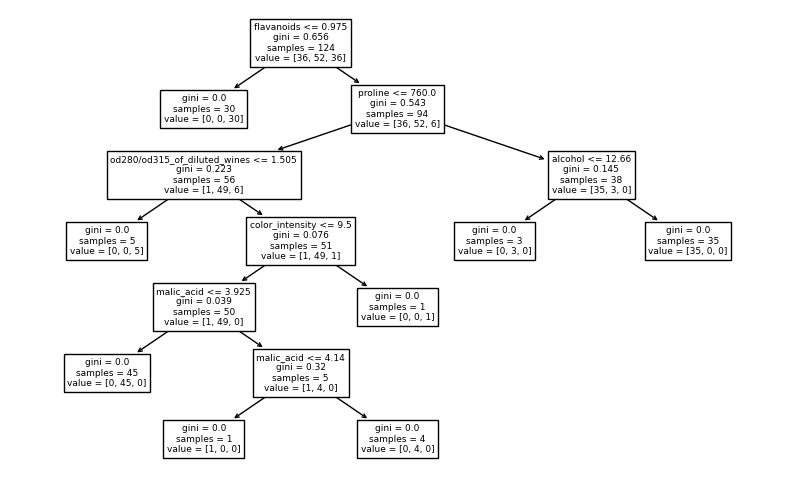

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,6))
plot_tree(dt,feature_names=dataset.feature_names)
plt.show()

In [53]:
dt.predict(x_test)

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

In [54]:
dt.predict_proba(x_test[:2])

array([[0., 0., 1.],
       [0., 1., 0.]])

In [56]:
dt = DecisionTreeClassifier(random_state=1,max_depth= 2)
dt.fit(x_train,y_train)
dt.predict_proba(x_test[:2])

array([[0.        , 0.        , 1.        ],
       [0.01785714, 0.875     , 0.10714286]])

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.pipeline import Pipeline
kf = KFold(n_splits=5)

hyper_params = {'max_depth' : range(2,11),
                'min_samples_split' : range(2,6),
                'criterion' : ['gini', 'entropy', 'log_loss'],
                'splitter' : ['best', 'random'],
                'min_weight_fraction_leaf' : np.linspace(0,0.05,5),
                'max_features' : np.linspace(0.5,1,6)
                }

model = DecisionTreeClassifier(random_state=1)

gcv = GridSearchCV(model,param_grid=hyper_params,cv = kf, scoring='accuracy')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'} 0.9438095238095237


In [67]:
from sklearn.model_selection import KFold,GridSearchCV
kf = KFold(n_splits=5)

hyper_params = {'criterion' : ['gini', 'entropy', 'log_loss'],
                'splitter' : ['best', 'random'],
                'max_features' : np.linspace(0.5,1,6),
                'ccp_alpha' : np.linspace(0,0.1,10)
                }

model = DecisionTreeClassifier(random_state=1)

gcv = GridSearchCV(model,param_grid=hyper_params,cv = kf, scoring='accuracy')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'ccp_alpha': 0.03333333333333333, 'criterion': 'entropy', 'max_features': 0.7, 'splitter': 'best'} 0.9438095238095239


In [68]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
X = dataset.data
Y = dataset.target

In [69]:
# pre pruning
from sklearn.tree import DecisionTreeRegressor

hyper_params = {'criterion' : ['squared_error', 'absolute_error'],
                'splitter' : ['best', 'random'],
                'max_features' : np.linspace(0.5,1,6),
                'max_depth' : range(2,11)
                }

model = DecisionTreeRegressor(random_state=1)

gcv = GridSearchCV(model,param_grid=hyper_params,cv = kf, scoring='neg_mean_squared_error')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 0.9, 'splitter': 'random'} -3735.268200493857


In [75]:
# post pruning
from sklearn.tree import DecisionTreeRegressor

hyper_params = {'criterion' : ['squared_error', 'absolute_error'],
                'splitter' : ['best', 'random'],
                'max_features' : np.linspace(0.3,1,8),
                'ccp_alpha' : np.linspace(0.7,0.9,20)
                }

model = DecisionTreeRegressor(random_state=1)

gcv = GridSearchCV(model,param_grid=hyper_params,cv = kf, scoring='neg_mean_squared_error')
gcv.fit(X,Y)
print(gcv.best_params_,gcv.best_score_)

{'ccp_alpha': 0.7526315789473684, 'criterion': 'absolute_error', 'max_features': 0.5, 'splitter': 'best'} -3850.1920773748725


In [77]:
from sklearn.datasets import load_diabetes
dataset = load_diabetes()
X = dataset.data
Y = dataset.target

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x_train, x_test, y_train, y_test =  train_test_split(X,Y,test_size=0.3,random_state=1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_x_train = ss.fit_transform(x_train)
scaled_x_test =  ss.transform(x_test)

lr.fit(scaled_x_train,y_train)
lr.coef_

array([ -0.63290115, -11.32376659,  28.12590693,  15.89995864,
       -31.56306693,  16.35314206,   4.20669415,  10.37107451,
        32.52887279,   2.23249758])

In [84]:
df = pd.DataFrame(np.abs(lr.coef_.reshape(-1,1)),columns=['Importance'],index=dataset.feature_names)
df

,Importance
age,0.632901
sex,11.323767
bmi,28.125907
bp,15.899959
s1,31.563067
s2,16.353142
s3,4.206694
s4,10.371075
s5,32.528873
s6,2.232498


In [85]:
df.sort_values('Importance',ascending=False)

,Importance
s5,32.528873
s1,31.563067
bmi,28.125907
s2,16.353142
bp,15.899959
sex,11.323767
s4,10.371075
s3,4.206694
s6,2.232498
age,0.632901


In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(LinearRegression(),n_features_to_select=8)
rfe.fit(scaled_x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=8)

In [92]:
rfe.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

In [93]:
dataset.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [94]:
rfe.ranking_

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [96]:
rfe.ranking_

array([3, 1, 1, 1, 1, 1, 1, 1, 1, 2])

In [99]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(scaled_x_train,y_train)
mses = []
mses.append(mean_squared_error(y_test,lr.predict(scaled_x_test)))
print("with all features : MSE", mses[0])
rfe = RFE(LinearRegression(),n_features_to_select=9)
rfe.fit(scaled_x_train,y_train)

lr.fit(scaled_x_train[:,rfe.support_],y_train)
mses.append(mean_squared_error(y_test,lr.predict(scaled_x_test[:,rfe.support_])))
print("with 9 features : MSE", mses[1])

with all features : MSE 2827.0840174240825
with 9 features : MSE 2826.877098761663


In [103]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(scaled_x_train,y_train)
mses = []
mses.append(mean_squared_error(y_test,lr.predict(scaled_x_test)))
print("with all features : MSE", mses[0])
c = 0
for num in range(9,0,-1):
    c = c+1
    rfe = RFE(LinearRegression(),n_features_to_select=num)
    rfe.fit(scaled_x_train,y_train)

    lr.fit(scaled_x_train[:,rfe.support_],y_train)
    mses.append(mean_squared_error(y_test,lr.predict(scaled_x_test[:,rfe.support_])))
    print("with", num," features : MSE", mses[c])

with all features : MSE 2827.0840174240825
with 9  features : MSE 2826.877098761663
with 8  features : MSE 2839.286684004787
with 7  features : MSE 2841.3971819856943
with 6  features : MSE 2831.6629604621635
with 5  features : MSE 2939.8327177311517
with 4  features : MSE 3088.9702119131052
with 3  features : MSE 3148.34900111692
with 2  features : MSE 3234.5139331347036
with 1  features : MSE 4095.9143737984323
